# visualize 

# 1. Top 3 Important Factors effecting employee performance

In [43]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# machine learning

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# for warnings 
import warnings
warnings.filterwarnings('ignore')



import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from imblearn.over_sampling import SMOTE
#import xgboost

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

# A.Random Forest Classifier

In [44]:
file = r'INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls'
original_data= pd.read_excel(file)

# Empty list to store columns with categorical data
categorical = []
for col, value in original_data.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

# Store the numerical columns in a list numerical
numerical = original_data.columns.difference(categorical)

# Store the categorical data in a dataframe called attrition_cat
original_cat = original_data[categorical]
original_cat = original_cat.drop(['EmpNumber'], axis=1) 
original_cat = pd.get_dummies(original_cat)

# Store the numerical features to a dataframe attrition_num
original_num = original_data[numerical]
original_num = original_num.drop(['PerformanceRating'], axis=1) # To remove the target column PerformanceRating 

# Concat the two dataframes together columnwise
original_final = pd.concat([original_num, original_cat], axis=1)

# Import the train_test_split method
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import StratifiedShuffleSplit


target = original_data.loc[:,['PerformanceRating']] # Target Performance Rating 


# Split data into train and test sets as well as for validation and testing
train, test, target_train, target_test = train_test_split(original_final, target, train_size= 0.75,random_state=0);
#train, test, target_train, target_val = StratifiedShuffleSplit(attrition_final, target, random_state=0);

from imblearn.over_sampling import SMOTE

oversampler= SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(train,target_train)

seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 800,
    'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 9,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

rf = RandomForestClassifier(**rf_params)

rf.fit(smote_train, smote_target)


rf_predictions = rf.predict(test)


## Feature Ranking via the Random Forest
The Random Forest classifier in Sklearn also contains a very convenient and most useful attribute featureimportances which tells us which features within our dataset has been given most importance through the Random Forest algorithm. Shown below is an Interactive Plotly diagram of the various feature importances.

In [45]:
# Scatter plot 
trace = go.Scatter(
    y = rf.feature_importances_,
    x = original_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = original_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance Level',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

### Most RF important features : Employment environtmnet satisfaction, emp salery hike , years since last promation
As observed in the plot of feature importances, it seems that our Random Forest Classifier has decided to rank the features of OverTime highest, which is followed by marital status.

I don't know about you, but working overtime to me does indeed affect my satisfaction derived from any job (and I have worked many an overtime). Maybe then it should come as no surprise that our classifier has caught on to this and thus ranked overtime the highest.

# <brc>

# B. Gradient Boosted Classifier


In [46]:
# Gradient Boosting Parameters
gb_params ={
    'n_estimators': 500,
    'max_features': 0.9,
    'learning_rate' : 0.2,
    'max_depth': 11,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

gb = GradientBoostingClassifier(**gb_params)
# Fit the model to our SMOTEd train and target
gb.fit(smote_train, smote_target)
# Get our predictions
gb_predictions = gb.predict(test)


## Feature Ranking via the Gradient Boosting Model
Much like the Random Forest, we can invoke the featureimportances attribute of the gradient boosting model and dump it in an interactive Plotly chart

In [47]:
# Scatter plot 
trace = go.Scatter(
    y = gb.feature_importances_,
    x = original_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = gb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = original_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Model Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance Level',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter')

# <brc>

# 2.Department wise performances

In department wise performance,  we have to analyze the data by each department present in the category. The data frame has to be separated or sliced according to department wise. 

In Employee department feature there are six departments available. 
- Sales 
- Human Resoruces 
- Development 
- Data Science 
- Reserch & Devlopment 
-  Finace 

## Sales Department 

In [48]:
sales = original_data[original_data.EmpDepartment == 'Sales'] # Slicing the all coloums of Sales Row 
sales.head(1)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3


# <brc>

###  (i) Performance Rating with respect to number of employees

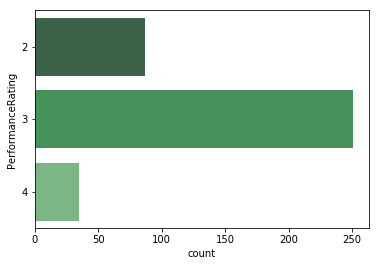

In [49]:
sns.countplot(y="PerformanceRating", data=sales, palette="Greens_d");

# <brc>

###  (ii) Performance Rating with respect to Age Group

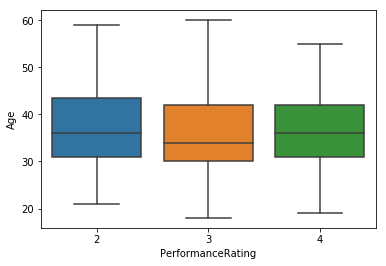

In [50]:
sns.boxplot(sales['PerformanceRating'], sales['Age'])

# <brc>

### (iii) Performance based on Gender

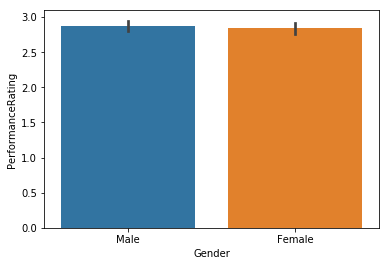

In [51]:
sns.barplot(sales['Gender'], sales['PerformanceRating'])

# <brc>

### (iv) Performance According to the Experience Level

In [52]:
data = [
    {
        'x': sales['TotalWorkExperienceInYears'],
        'y': sales['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':sales['ExperienceYearsAtThisCompany'],
        'y':sales['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': sales['ExperienceYearsInCurrentRole'],
        'y': sales['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - Sales',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

# <brc>

## Human Resoruces Department 

In [53]:
HR = original_data[original_data.EmpDepartment == 'Human Resources'] # Slicing the all coloums of Sales Row 
HR.head(3)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
16,E1001038,39,Female,Human Resources,Married,Human Resources,Human Resources,Travel_Rarely,3,3,...,3,12,3,1,8,3,3,6,No,3
58,E1001107,36,Male,Human Resources,Married,Human Resources,Human Resources,Travel_Rarely,13,3,...,2,8,2,3,5,2,0,4,No,3


# <brc>

###  (i) Performance Rating with respect to number of employees

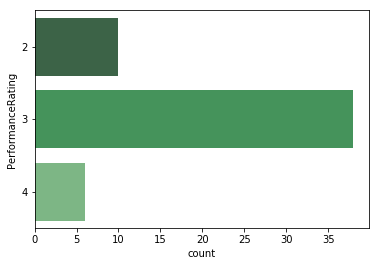

In [54]:
sns.countplot(y="PerformanceRating", data=HR, palette="Greens_d");

# <brc>

###  (ii) Performance Rating with respect to Age Group

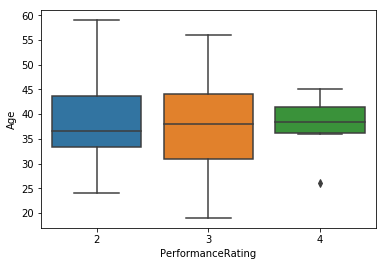

In [55]:
sns.boxplot(HR['PerformanceRating'], HR['Age'])

# <brc>

### (iii) Performance based on Gender

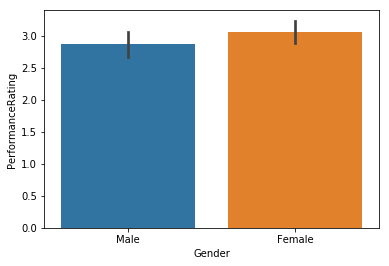

In [56]:
sns.barplot(HR['Gender'], HR['PerformanceRating'])

# <brc>

### (iv) Performance According to the Experience Level

In [57]:
data = [
    {
        'x': HR['TotalWorkExperienceInYears'],
        'y': HR['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':HR['ExperienceYearsAtThisCompany'],
        'y':HR['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': HR['ExperienceYearsInCurrentRole'],
        'y': HR['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - HR ',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

# <brc>

# <brc>

## Development Department 

In [58]:
Development = original_data[original_data.EmpDepartment == 'Development'] # Slicing the all coloums of Sales Row 
Development.head(3)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
5,E1001011,27,Male,Life Sciences,Divorced,Development,Developer,Travel_Frequently,10,2,...,3,9,4,2,9,7,1,7,No,4
7,E1001019,28,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,1,2,...,4,10,4,3,7,7,3,7,Yes,3
8,E1001020,36,Female,Life Sciences,Married,Development,Developer,Non-Travel,8,3,...,1,10,2,3,8,7,0,5,No,3


# <brc>

###  (i) Performance Rating with respect to number of employees

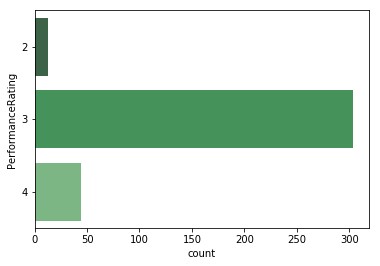

In [59]:
sns.countplot(y="PerformanceRating", data=Development, palette="Greens_d");

# <brc>

###  (ii) Performance Rating with respect to Age Group

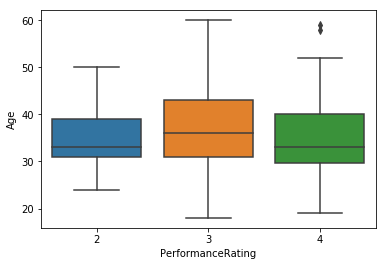

In [60]:
sns.boxplot(Development['PerformanceRating'], Development['Age'])

# <brc>

### (iii) Performance based on Gender

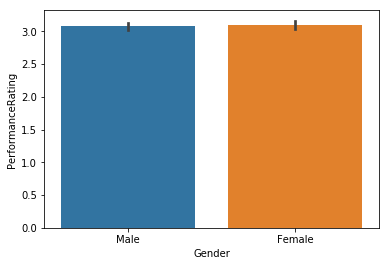

In [61]:
sns.barplot(Development['Gender'], Development['PerformanceRating'])

# <brc>

### (iv) Performance According to the Experience Level

In [62]:
data = [
    {
        'x': Development['TotalWorkExperienceInYears'],
        'y': Development['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':Development['ExperienceYearsAtThisCompany'],
        'y':Development['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': Development['ExperienceYearsInCurrentRole'],
        'y': Development['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - Development ',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

# <brc>

## Data Science Department 

In [63]:
Data_Science = original_data[original_data.EmpDepartment == 'Data Science'] # Slicing the all coloums of Sales Row 
Data_Science.head(3)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
89,E1001165,49,Female,Technical Degree,Married,Data Science,Data Scientist,Travel_Rarely,1,3,...,2,7,2,3,4,2,0,2,No,3
107,E1001201,21,Female,Other,Single,Data Science,Data Scientist,Travel_Rarely,18,1,...,1,1,3,2,1,0,0,0,Yes,3
108,E1001202,36,Male,Life Sciences,Married,Data Science,Data Scientist,Travel_Rarely,14,1,...,1,17,2,2,16,8,4,11,No,3


# <brc>

###  (i) Performance Rating with respect to number of employees

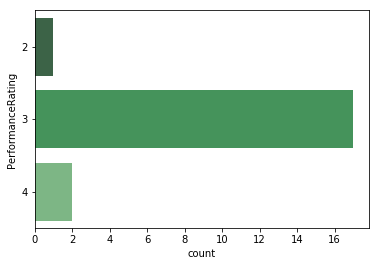

In [64]:
sns.countplot(y="PerformanceRating", data=Data_Science, palette="Greens_d");

# <brc>

###  (ii) Performance Rating with respect to Age Group

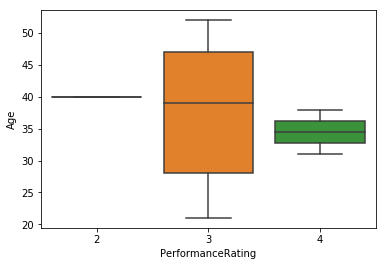

In [65]:
sns.boxplot(Data_Science['PerformanceRating'], Data_Science['Age'])

# <brc>

### (iii) Performance based on Gender

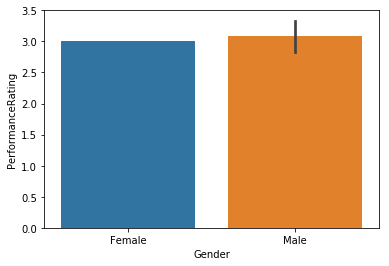

In [66]:
sns.barplot(Data_Science['Gender'], Data_Science['PerformanceRating'])

# <brc>

### (iv) Performance According to the Experience Level

In [67]:
data = [
    {
        'x': Data_Science['TotalWorkExperienceInYears'],
        'y': Data_Science['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':Data_Science['ExperienceYearsAtThisCompany'],
        'y':Data_Science['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': Data_Science['ExperienceYearsInCurrentRole'],
        'y': Data_Science['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - Data Science ',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

# <brc>

## Research & Development Department 

In [68]:
RD = original_data[original_data.EmpDepartment == 'Research & Development'] # Slicing the all coloums of Sales Row 
RD.head(3)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
156,E1001284,38,Male,Medical,Married,Research & Development,Senior Manager R&D,Travel_Frequently,10,1,...,2,3,0,2,2,1,0,2,No,3
157,E1001288,35,Male,Other,Divorced,Research & Development,Laboratory Technician,Travel_Rarely,14,4,...,4,5,2,1,4,2,0,2,Yes,3
158,E1001289,31,Female,Life Sciences,Married,Research & Development,Manufacturing Director,Travel_Frequently,1,1,...,3,4,1,3,4,3,0,3,No,3


# <brc>

###  (i) Performance Rating with respect to number of employees

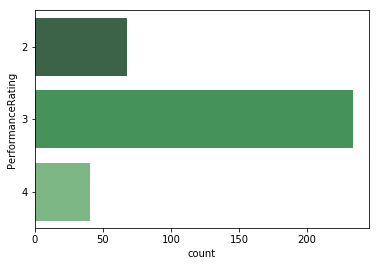

In [69]:
sns.countplot(y="PerformanceRating", data=RD, palette="Greens_d");

# <brc>

###  (ii) Performance Rating with respect to Age Group

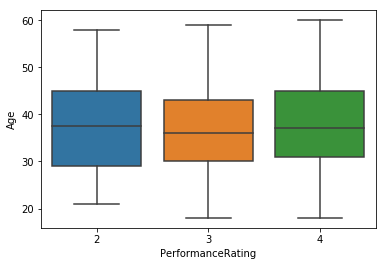

In [70]:
sns.boxplot(RD['PerformanceRating'], RD['Age'])

# <brc>

### (iii) Performance based on Gender

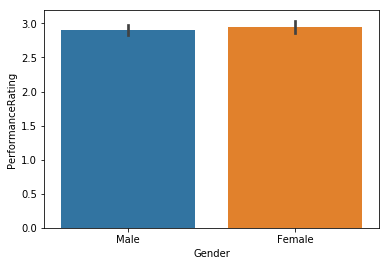

In [71]:
sns.barplot(RD['Gender'], RD['PerformanceRating'])

# <brc>

### (iv) Performance According to the Experience Level

In [72]:
data = [
    {
        'x': RD['TotalWorkExperienceInYears'],
        'y': RD['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':RD['ExperienceYearsAtThisCompany'],
        'y':RD['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': RD['ExperienceYearsInCurrentRole'],
        'y': RD['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - R & D',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

# <brc>

## Finance Department 

In [73]:
Finance = original_data[original_data.EmpDepartment == 'Finance'] # Slicing the all coloums of Sales Row 
Finance.head(3)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
482,E1001868,29,Male,Life Sciences,Divorced,Finance,Finance Manager,Travel_Frequently,2,1,...,4,6,0,4,6,4,1,3,No,2
484,E1001870,23,Male,Technical Degree,Married,Finance,Finance Manager,Travel_Rarely,10,3,...,4,4,2,3,2,2,2,2,No,3
485,E1001874,35,Male,Life Sciences,Married,Finance,Finance Manager,Travel_Rarely,28,3,...,4,10,3,2,10,9,6,8,No,2


# <brc>

###  (i) Performance Rating with respect to number of employees

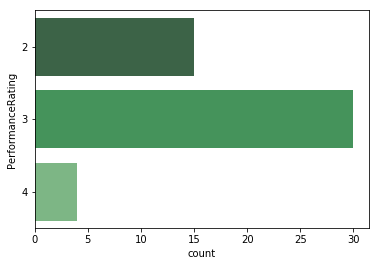

In [74]:
sns.countplot(y="PerformanceRating", data=Finance, palette="Greens_d");

# <brc>

###  (ii) Performance Rating with respect to Age Group

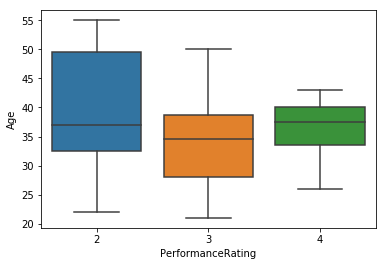

In [75]:
sns.boxplot(Finance['PerformanceRating'], Finance['Age'])

# <brc>

### (iii) Performance based on Gender

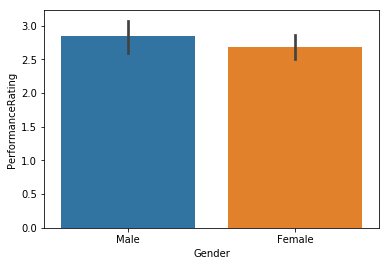

In [76]:
sns.barplot(Finance['Gender'], Finance['PerformanceRating'])

# <brc>

### (iv) Performance According to the Experience Level

In [77]:
data = [
    {
        'x': Finance['TotalWorkExperienceInYears'],
        'y': Finance['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':Finance['ExperienceYearsAtThisCompany'],
        'y':Finance['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': Finance['ExperienceYearsInCurrentRole'],
        'y': Finance['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - Finance ',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)